In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder

In [93]:
df = pd.read_csv('Air_quality_index.csv')
df1 = df.copy()
df1.head(10)

,Latitude,Longitude,POC,State Name,County Name,City Name,Date Local,Month,Day,Event Type,Observation Count,Mean_Ozone_Concentration,Max_Ozone_Value,Hour_Max_Ozone_Concentration,Air_Quality_Index,AQI_Range
0,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-02-28,2,28,None,1,0.038000,0.038,14.0,35,Good
1,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-01,3,1,None,17,0.037235,0.054,12.0,50,Good
2,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-02,3,2,None,17,0.038235,0.055,12.0,51,Moderate
3,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-03,3,3,None,9,0.024333,0.043,14.0,40,Good
4,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-04,3,4,None,17,0.049647,0.063,10.0,77,Moderate
5,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-05,3,5,None,17,0.039353,0.044,9.0,41,Good
6,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-06,3,6,None,17,0.029824,0.033,7.0,31,Good
7,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-07,3,7,None,17,0.027706,0.029,9.0,27,Good
8,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-08,3,8,None,17,0.018118,0.020,11.0,19,Good
9,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-09,3,9,None,17,0.019235,0.022,12.0,20,Good


In [94]:
# Converting AQI_Range into 0(Good) or 1(Bad) classes
df1['AQI_Range'] = df1.apply(lambda row: 1 if row['Air_Quality_Index'] > 50 else 0, axis=1)
df1.head(10)

,Latitude,Longitude,POC,State Name,County Name,City Name,Date Local,Month,Day,Event Type,Observation Count,Mean_Ozone_Concentration,Max_Ozone_Value,Hour_Max_Ozone_Concentration,Air_Quality_Index,AQI_Range
0,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-02-28,2,28,None,1,0.038000,0.038,14.0,35,0
1,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-01,3,1,None,17,0.037235,0.054,12.0,50,0
2,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-02,3,2,None,17,0.038235,0.055,12.0,51,1
3,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-03,3,3,None,9,0.024333,0.043,14.0,40,0
4,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-04,3,4,None,17,0.049647,0.063,10.0,77,1
5,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-05,3,5,None,17,0.039353,0.044,9.0,41,0
6,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-06,3,6,None,17,0.029824,0.033,7.0,31,0
7,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-07,3,7,None,17,0.027706,0.029,9.0,27,0
8,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-08,3,8,None,17,0.018118,0.020,11.0,19,0
9,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-09,3,9,None,17,0.019235,0.022,12.0,20,0


In [95]:
# Binning the continuous columns 
bin_labels = ['low', 'medium', 'high']

df1['Mean_Ozone_Concentration'] = pd.cut(df1['Mean_Ozone_Concentration'], bins=3, labels=bin_labels)
df1['Max_Ozone_Value'] = pd.cut(df1['Max_Ozone_Value'], bins=3, labels=bin_labels)
df1['Hour_Max_Ozone_Concentration'] = pd.cut(df1['Hour_Max_Ozone_Concentration'], bins=3, labels=bin_labels)


In [96]:
df1.head(10)

,Latitude,Longitude,POC,State Name,County Name,City Name,Date Local,Month,Day,Event Type,Observation Count,Mean_Ozone_Concentration,Max_Ozone_Value,Hour_Max_Ozone_Concentration,Air_Quality_Index,AQI_Range
0,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-02-28,2,28,None,1,medium,low,high,35,0
1,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-01,3,1,None,17,medium,low,high,50,0
2,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-02,3,2,None,17,medium,low,high,51,1
3,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-03,3,3,None,9,low,low,high,40,0
4,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-04,3,4,None,17,high,medium,medium,77,1
5,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-05,3,5,None,17,medium,low,low,41,0
6,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-06,3,6,None,17,medium,low,low,31,0
7,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-07,3,7,None,17,medium,low,low,27,0
8,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-08,3,8,None,17,low,low,medium,19,0
9,30.497478,-87.880258,1,Alabama,Baldwin,Fairhope,2022-03-09,3,9,None,17,low,low,high,20,0


In [97]:
# Transforming Categorical variables to Numerical
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
columns_to_encode = ["State Name", "County Name", "City Name","Event Type","Mean_Ozone_Concentration", "Max_Ozone_Value", "Hour_Max_Ozone_Concentration"]
df1[columns_to_encode] = df1[columns_to_encode].apply(le.fit_transform)
df1.head(10)

,Latitude,Longitude,POC,State Name,County Name,City Name,Date Local,Month,Day,Event Type,Observation Count,Mean_Ozone_Concentration,Max_Ozone_Value,Hour_Max_Ozone_Concentration,Air_Quality_Index,AQI_Range
0,30.497478,-87.880258,1,0,23,202,2022-02-28,2,28,2,1,2,1,0,35,0
1,30.497478,-87.880258,1,0,23,202,2022-03-01,3,1,2,17,2,1,0,50,0
2,30.497478,-87.880258,1,0,23,202,2022-03-02,3,2,2,17,2,1,0,51,1
3,30.497478,-87.880258,1,0,23,202,2022-03-03,3,3,2,9,1,1,0,40,0
4,30.497478,-87.880258,1,0,23,202,2022-03-04,3,4,2,17,0,2,2,77,1
5,30.497478,-87.880258,1,0,23,202,2022-03-05,3,5,2,17,2,1,1,41,0
6,30.497478,-87.880258,1,0,23,202,2022-03-06,3,6,2,17,2,1,1,31,0
7,30.497478,-87.880258,1,0,23,202,2022-03-07,3,7,2,17,2,1,1,27,0
8,30.497478,-87.880258,1,0,23,202,2022-03-08,3,8,2,17,1,1,2,19,0
9,30.497478,-87.880258,1,0,23,202,2022-03-09,3,9,2,17,1,1,0,20,0


In [98]:
# Selecting relevant features and target variable
X = df1[['Mean_Ozone_Concentration', 'Max_Ozone_Value', 'Hour_Max_Ozone_Concentration', 'Air_Quality_Index']]
y = df1['AQI_Range']


# Now, split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train

,Mean_Ozone_Concentration,Max_Ozone_Value,Hour_Max_Ozone_Concentration,Air_Quality_Index
194921,2,1,0,40
142123,2,1,1,48
75092,2,1,0,28
23367,2,1,1,41
186851,0,1,1,43
...,...,...,...,...
119879,2,1,2,42
103694,1,1,0,29
131932,2,1,0,38
146867,1,1,2,35


In [109]:
# Without Laplace estimator
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))


Confusion Matrix:
[[50838  1662]
 [ 2648  5155]]
Accuracy: 0.928527602275177
F1 Score: 0.9264499445237007


In [110]:
# With Laplace estimator
clf_laplace = MultinomialNB(alpha=2.0, fit_prior=True)
clf_laplace.fit(X_train, y_train)
y_pred_laplace = clf_laplace.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred_laplace)

print("\nWith Laplace Estimator:")
print("Confusion Matrix:")
print(cm1)
print("Accuracy:", accuracy_score(y_test, y_pred_laplace))
print("F1 Score:", f1_score(y_test, y_pred_laplace, average='weighted'))


With Laplace Estimator:
Confusion Matrix:
[[50838  1662]
 [ 2648  5155]]
Accuracy: 0.928527602275177
F1 Score: 0.9264499445237007


<AxesSubplot:>

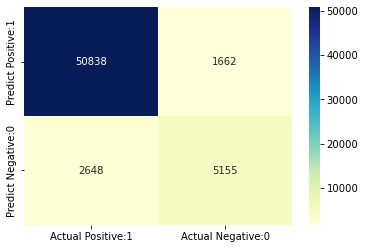

In [108]:
# visualize confusion matrix with seaborn heatmap(without laplace estimator)
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model

In [101]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     52500
           1       0.76      0.66      0.71      7803

    accuracy                           0.93     60303
   macro avg       0.85      0.81      0.83     60303
weighted avg       0.93      0.93      0.93     60303



In [102]:
# Check for overfitting and underfitting

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))


Training set score: 0.9278
Test set score: 0.9285


The training-set accuracy score is 0.9278 while the test-set accuracy to be 0.9285. These two values are quite comparable. So, there is no sign of overfitting.

# Compare model accuracy with null accuracy

So, the model accuracy is 0.9285. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we first check the class distribution in the test set.

In [103]:
# check class distribution in test set

y_test.value_counts()


0    52500
1     7803
Name: AQI_Range, dtype: int64

In [104]:
# check null accuracy score

null_accuracy = (52500/(52500+7803))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.8706


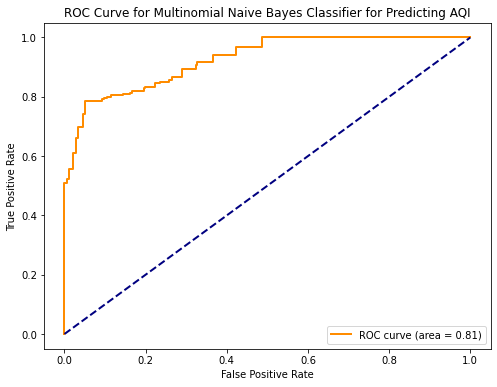

In [112]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multinomial Naive Bayes Classifier for Predicting AQI')
plt.legend(loc="lower right")
plt.show()
